In [1]:
import torch

In [2]:
############ DATA & TRANSFORMS

from data import get_data
from device import get_device


device = get_device(force_cpu=False)
train_loader, test_loader = get_data(device,batch_size=64,data = 'cifar10')

0it [00:00, ?it/s]

100%|█████████████████████████████████████████████████████████████▊| 170024960/170498071 [00:19<00:00, 10857257.39it/s]

Files already downloaded and verified


170500096it [00:30, 10857257.39it/s]                                                                                   

In [3]:
##################### MODEL


from model import NetCifar2
from torchsummary import summary
model = NetCifar2().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,320
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
         MaxPool2d-9           [-1, 16, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           4,640
             ReLU-11           [-1, 32, 16, 16]               0
      BatchNorm2d-12           [-1, 32, 16, 16]              64
          Dropout-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

In [4]:
##################### RUN MODEL

from run import run_model

epochs = 20
regularization = {'l1_factor':0,'l2_factor':0}

model,train_trackers,test_trackers,incorrect_samples = run_model(model, train_loader, test_loader, epochs, device, **regularization)


Epoch 1:


170500096it [06:53, 412264.56it/s]  


(TRAIN) batch_number:  100 Loss : 1.845 Acc : 0.31109
(TRAIN) batch_number:  200 Loss : 1.463 Acc : 0.3757
(TRAIN) batch_number:  300 Loss : 1.626 Acc : 0.41943
(TRAIN) batch_number:  400 Loss : 1.197 Acc : 0.45266
(TRAIN) batch_number:  500 Loss : 0.7586 Acc : 0.48103
(TRAIN) batch_number:  600 Loss : 1.047 Acc : 0.50328
(TRAIN) batch_number:  700 Loss : 0.8747 Acc : 0.52152
(TEST) Correct_classified :  6320  of 10000
(TEST) Loss : 1.022 Acc : 0.632

 ************************************************************ 


Epoch 2:
(TRAIN) batch_number:  100 Loss : 1.111 Acc : 0.68141
(TRAIN) batch_number:  200 Loss : 0.9063 Acc : 0.68477
(TRAIN) batch_number:  300 Loss : 1.131 Acc : 0.68812
(TRAIN) batch_number:  400 Loss : 0.8072 Acc : 0.68855
(TRAIN) batch_number:  500 Loss : 0.9458 Acc : 0.693
(TRAIN) batch_number:  600 Loss : 0.8714 Acc : 0.69667
(TRAIN) batch_number:  700 Loss : 0.7241 Acc : 0.70038
(TEST) Correct_classified :  7221  of 10000
(TEST) Loss : 0.8094 Acc : 0.7221

 *********

(TRAIN) batch_number:  400 Loss : 0.2032 Acc : 0.95562
(TRAIN) batch_number:  500 Loss : 0.2087 Acc : 0.95606
(TRAIN) batch_number:  600 Loss : 0.08782 Acc : 0.95534
(TRAIN) batch_number:  700 Loss : 0.1102 Acc : 0.95562
(TEST) Correct_classified :  8073  of 10000
(TEST) Loss : 0.6366 Acc : 0.8073

 ************************************************************ 


Epoch 17:
(TRAIN) batch_number:  100 Loss : 0.08545 Acc : 0.95734
(TRAIN) batch_number:  200 Loss : 0.26 Acc : 0.9575
(TRAIN) batch_number:  300 Loss : 0.1133 Acc : 0.95719
(TRAIN) batch_number:  400 Loss : 0.1041 Acc : 0.95652
(TRAIN) batch_number:  500 Loss : 0.1704 Acc : 0.95697
(TRAIN) batch_number:  600 Loss : 0.1411 Acc : 0.95714
(TRAIN) batch_number:  700 Loss : 0.1988 Acc : 0.95699
(TEST) Correct_classified :  8058  of 10000
(TEST) Loss : 0.632 Acc : 0.8058

 ************************************************************ 


Epoch 18:
(TRAIN) batch_number:  100 Loss : 0.0991 Acc : 0.95828
(TRAIN) batch_number:  200 Loss : 

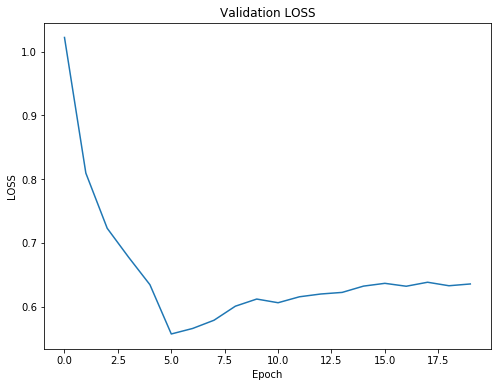

In [7]:
import matplotlib.pyplot as plt

metric = 'LOSS'
# Initialize a figure
fig = plt.figure(figsize=(8, 6))

# Plot values
plain_plt, = plt.plot(test_trackers['test_losses'])


# Set plot title
plt.title(f'Validation {metric}')

# Label axes
plt.xlabel('Epoch')
plt.ylabel(metric)

# Set legend
location = 'upper' if metric == 'Loss' else 'lower'
